# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [3]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
128042,0.1270,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0879,0.0024,0.0513,0,0,0,0
212444,0.1440,0.0024,0.0024,0.0024,0.0024,0.0098,0.2954,0.1587,0.0024,0.0781,3,3,14,14
334723,0.2881,0.0952,0.8154,0.1440,0.0122,0.0220,0.1709,0.3271,0.3564,0.0610,3,3,10,10
235936,0.5078,0.0708,1.1279,0.4102,0.0586,0.0024,0.0635,0.2539,0.4980,0.0708,1,1,17,17
24910,0.0220,0.0024,0.0366,0.0024,0.0024,0.0024,0.0195,0.1733,0.1294,0.0464,10,10,3,3


In [32]:
raw_data.head()

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0,0,0
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0,0,0
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,0,0,0,0
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,0,0,0,0
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,0,0,0,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [5]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [6]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [7]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [9]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [10]:
num_classes = 24

In [12]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.to_categorical(y, num_classes)

In [13]:
input_dim = X.shape[1]

# Standard Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [15]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [16]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [17]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [18]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [19]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [20]:
num_classes = 24
input_dim = X.shape[1]

In [21]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)

output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              33000     
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              4501500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 750)               1125750   
_________________________________________________________________
dense_3 (Dense)              (None, 375)               281625    
_________________________________________________________________
dense_4 (Dense)              (None, 48)               

# 2. Compile Network

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

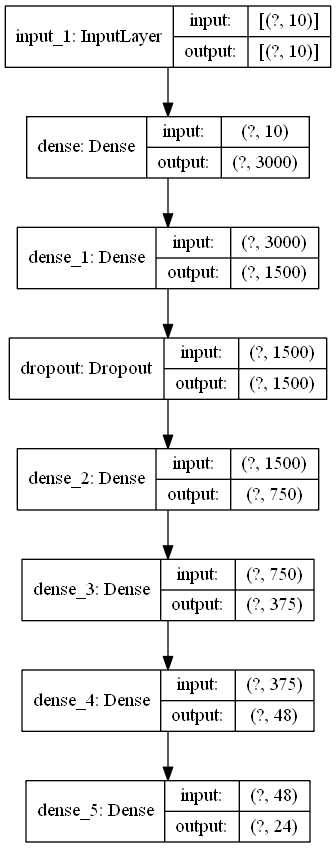

In [24]:
plot_model(model, 'Deep Neural Network Architecture.png', show_shapes = True)

# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 3s 27ms/step - loss: 1.3110 - accuracy: 0.6640 - val_loss: 0.9619 - val_accuracy: 0.7407
Epoch 2/300
75/75 [==============================] - 2s 26ms/step - loss: 0.9124 - accuracy: 0.7587 - val_loss: 0.8424 - val_accuracy: 0.7734
Epoch 3/300
75/75 [==============================] - 2s 25ms/step - loss: 0.7384 - accuracy: 0.7941 - val_loss: 0.6611 - val_accuracy: 0.8126
Epoch 4/300
75/75 [==============================] - 2s 25ms/step - loss: 0.6406 - accuracy: 0.8191 - val_loss: 0.6314 - val_accuracy: 0.8307
Epoch 5/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5877 - accuracy: 0.8336 - val_loss: 0.5476 - val_accuracy: 0.8435
Epoch 6/300
75/75 [==============================] - 2s 25ms/step - loss: 0.5420 - accuracy: 0.8442 - val_loss: 0.5148 - val_accuracy: 0.8533
Epoch 7/300
75/75 [==============================] - 2s 26ms/step - loss: 0.5097 - accuracy: 0.8528 - val_loss: 0.4937 - val_accuracy: 0.8570
Epoch 

75/75 [==============================] - 2s 26ms/step - loss: 0.1584 - accuracy: 0.9553 - val_loss: 0.2214 - val_accuracy: 0.9417
Epoch 116/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1625 - accuracy: 0.9543 - val_loss: 0.2274 - val_accuracy: 0.9402
Epoch 117/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1613 - accuracy: 0.9550 - val_loss: 0.2245 - val_accuracy: 0.9412
Epoch 118/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1587 - accuracy: 0.9553 - val_loss: 0.2218 - val_accuracy: 0.9422
Epoch 119/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1577 - accuracy: 0.9557 - val_loss: 0.2184 - val_accuracy: 0.9432
Epoch 120/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1572 - accuracy: 0.9560 - val_loss: 0.2236 - val_accuracy: 0.9414
Epoch 121/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1577 - accuracy: 0.9557 - val_loss: 0.2277 - val_accuracy: 0.9414
Epoch 

Epoch 172/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1358 - accuracy: 0.9621 - val_loss: 0.2176 - val_accuracy: 0.9461
Epoch 173/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1358 - accuracy: 0.9621 - val_loss: 0.2174 - val_accuracy: 0.9460
Epoch 174/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1350 - accuracy: 0.9622 - val_loss: 0.2234 - val_accuracy: 0.9454
Epoch 175/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1378 - accuracy: 0.9612 - val_loss: 0.2234 - val_accuracy: 0.9442
Epoch 176/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1362 - accuracy: 0.9617 - val_loss: 0.2200 - val_accuracy: 0.9457
Epoch 177/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1360 - accuracy: 0.9618 - val_loss: 0.2229 - val_accuracy: 0.9445
Epoch 178/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1366 - accuracy: 0.9618 - val_loss: 0.2267 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1230 - accuracy: 0.9652 - val_loss: 0.2334 - val_accuracy: 0.9465
Epoch 230/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1248 - accuracy: 0.9650 - val_loss: 0.2290 - val_accuracy: 0.9454
Epoch 231/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1243 - accuracy: 0.9650 - val_loss: 0.2404 - val_accuracy: 0.9444
Epoch 232/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1267 - accuracy: 0.9644 - val_loss: 0.2264 - val_accuracy: 0.9463
Epoch 233/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1202 - accuracy: 0.9663 - val_loss: 0.2226 - val_accuracy: 0.9479
Epoch 234/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1201 - accuracy: 0.9663 - val_loss: 0.2242 - val_accuracy: 0.9471
Epoch 235/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1212 - accuracy: 0.9659 - val_loss: 0.2241 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1103 - accuracy: 0.9689 - val_loss: 0.2328 - val_accuracy: 0.9465
Epoch 287/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1123 - accuracy: 0.9682 - val_loss: 0.2369 - val_accuracy: 0.9477
Epoch 288/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1130 - accuracy: 0.9683 - val_loss: 0.2323 - val_accuracy: 0.9479
Epoch 289/300
75/75 [==============================] - 2s 26ms/step - loss: 0.1118 - accuracy: 0.9685 - val_loss: 0.2308 - val_accuracy: 0.9475
Epoch 290/300
75/75 [==============================] - 2s 28ms/step - loss: 0.1121 - accuracy: 0.9684 - val_loss: 0.2328 - val_accuracy: 0.9477
Epoch 291/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1133 - accuracy: 0.9681 - val_loss: 0.2289 - val_accuracy: 0.9490
Epoch 292/300
75/75 [==============================] - 2s 27ms/step - loss: 0.1103 - accuracy: 0.9687 - val_loss: 0.2362 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

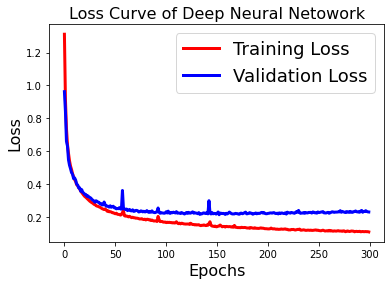

In [39]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

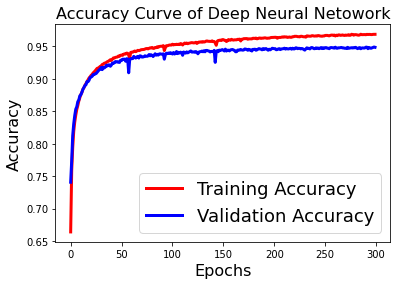

In [42]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [28]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [45]:
predictions

array([ 0, 19,  0, ..., 12,  0,  3], dtype=int64)

#### Transforming from One Hot Encoding

In [ ]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

In [51]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 94.87762029931181


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     40005
           1       0.96      0.87      0.91      2108
           2       0.95      0.88      0.92      1923
           3       0.92      0.88      0.90      2110
           4       0.95      0.89      0.92      1957
           5       0.96      0.90      0.93      2046
           6       0.96      0.89      0.93      2187
           7       0.93      0.90      0.92      1753
           8       0.93      0.88      0.90      1740
           9       0.93      0.91      0.92      1876
          10       0.97      0.86      0.91      2030
          11       0.93      0.92      0.93      1940
          12       0.91      0.79      0.85      2123
          13       0.97      0.91      0.94      1332
          14       0.92      0.94      0.93      1226
          15       0.97      0.91      0.94      1161
          16       0.96      0.96      0.96      1543
 

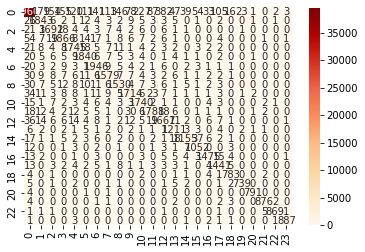

In [52]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 4s 2ms/step - loss: 0.2307 - accuracy: 0.9488


In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3646558442416157
MSE: 3.7920535749666477
RMSE: 1.9473195872703195


In [54]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9488050984691004
Recall Score :  0.9487762029931182
f1_score :  0.9480434631572031
